### !!! Next try change model to xgboost !!!
use more data (transform string Sex to int etc.)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train = train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [6]:
train['Age'][train.Age.isnull()] = train[~train.Age.isnull()]['Age'].median()

/home/ska/virtenv/bigd/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [33]:
import seaborn as sb

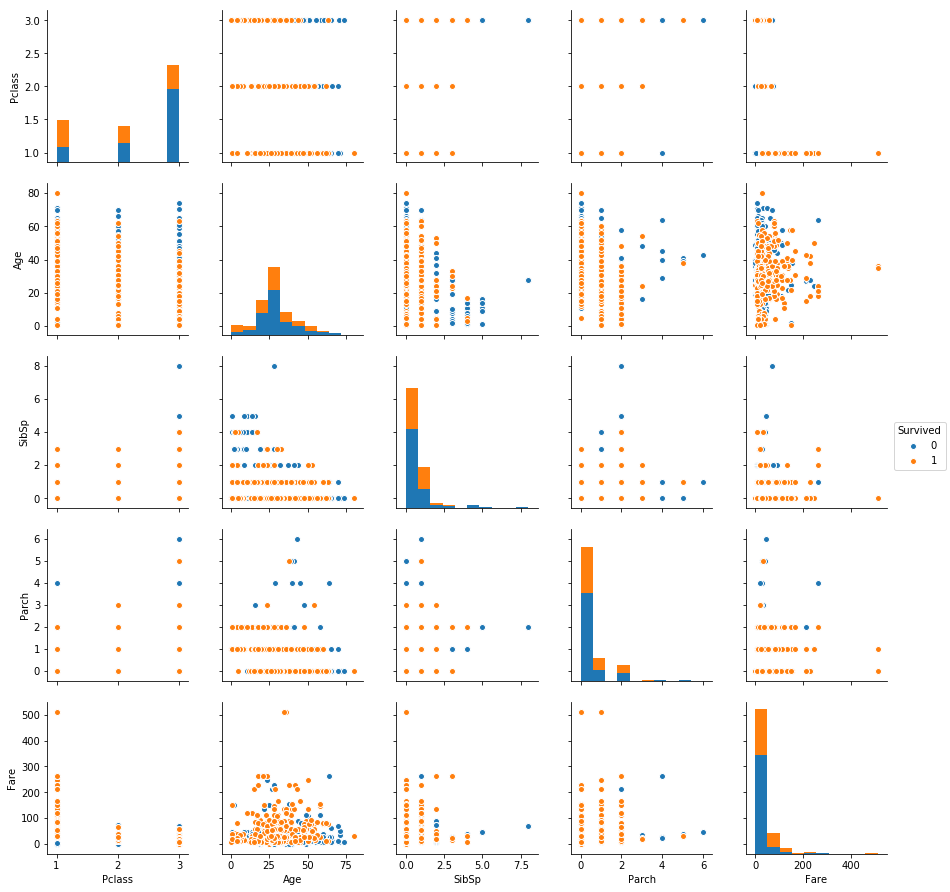

In [10]:
sb.pairplot(train, 
            hue='Survived', 
            vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = train.Survived

In [10]:
train = train.drop(['Survived'], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y,
    test_size=0.33,
    random_state=42
)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(X_train, y_train)
pred = lr.predict_proba(X_test)

In [42]:
pred[:,1]

array([ 0.25534146,  0.38413116,  0.29415895,  0.64194343,  0.28199528,
        0.69102236,  0.25053476,  0.23317443,  0.31718043,  0.74882382,
        0.52179647,  0.17763583,  0.18328779,  0.23974673,  0.35603892,
        0.738801  ,  0.48663985,  0.25063314,  0.41439001,  0.51288512,
        0.27187499,  0.55962348,  0.25085143,  0.29594746,  0.25901107,
        0.31799144,  0.52070742,  0.38805059,  0.35468315,  0.23553376,
        0.2998429 ,  0.28266894,  0.6062455 ,  0.25028645,  0.30584661,
        0.21929898,  0.61380489,  0.25053476,  0.59356815,  0.25071589,
        0.43224847,  0.20204009,  0.25090754,  0.25053476,  0.21485728,
        0.45721315,  0.30020753,  0.27910174,  0.27076892,  0.64531103,
        0.34097528,  0.54111293,  0.34281219,  0.84367241,  0.10811071,
        0.8134759 ,  0.37766597,  0.8152018 ,  0.37466247,  0.29981985,
        0.28829508,  0.57507711,  0.36981021,  0.59868797,  0.25053476,
        0.23417438,  0.55448954,  0.24557521,  0.3053894 ,  0.46

In [43]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])

(-0.01, 1.01)

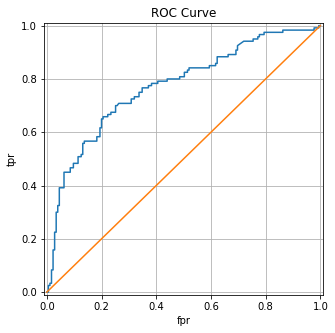

In [44]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [45]:
test = pd.read_csv('test.csv')

In [46]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [47]:
res = pd.DataFrame(test.PassengerId)

In [48]:
test = test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(2), int64(3)
memory usage: 16.4 KB


In [50]:
test.head(1)

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292


In [51]:
test['Age'][test.Age.isnull()] = test[~test.Age.isnull()]['Age'].median()

/home/ska/virtenv/bigd/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
test['Fare'][test.Fare.isnull()] = test[~test.Fare.isnull()]['Fare'].median()

/home/ska/virtenv/bigd/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
lr.fit(train, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
pred2 = lr.predict(test)

In [55]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [56]:
testgraph = test
testgraph.insert(1, 'Survived', pred2)

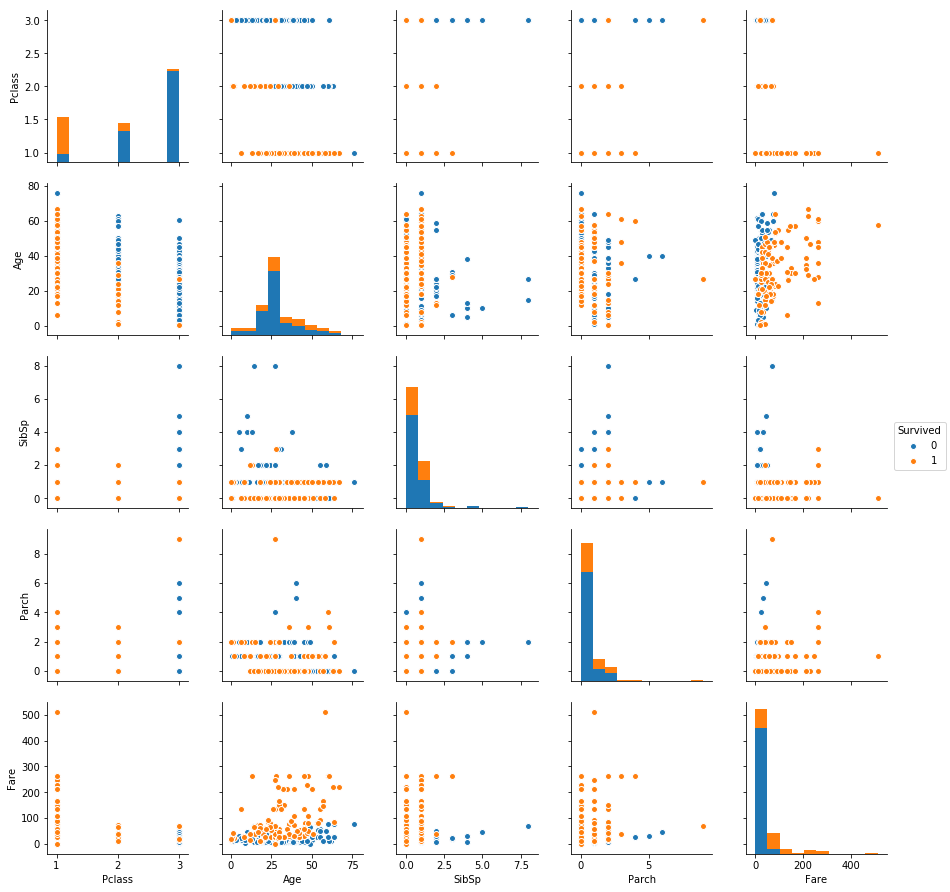

In [34]:
sb.pairplot(testgraph, 
            hue='Survived', 
            vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [57]:
res.insert(1, 'Survived', pred2)

In [58]:
res.to_csv('predict.csv', index=False)

In [39]:
# pred2proba = lr.predict_proba(test)

In [40]:
# test

In [41]:
# fpr2, tpr2, thresholds2 = metrics.roc_curve(test, pred2proba[:,1])

In [42]:
from sklearn import metrics

In [43]:
metrics.precision_score(y_test, pred)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [56]:
metrics.accuracy_score(y_test, pred)

0.73220338983050848